# A zoo of probability distributions

Now that we have some philosophical thinking about priors, it would be helpful to have some helpful tools for constructing priors. There are two sorts of thinks we need to think about when setting a prior.

1. The domain. A prior needs to cover the right range of possibilities. Some parameters are tightly bound. Like accuracy parameters - they are bound between 0 and 1. But other parameters are unbounded. Like elevation. In principle, a mountain could be as tall as it wants or a valley can be as low as it wants. So if we want to estimate the elevation of something, we need a prior that can range over parameters postive or negative.

2. The shape. A prior needs to be able to make some parameters more plausible then others. So we need to be able to easily adjust how much weight is given to certain regions of the parameter. 

I'm going to show you four different distributions that are handy for setting priors in nearly all cases. Each one is designated by the range it spans. Within that range, the parameters of the distribution help you control the shape.

## For parameters bound between 0 and 1

Here is the beta distribution. Notice it starts and stops at 0 and 1. Play around with the a and b parameters for a while to get a sense for its shape. What happens as $a$ goes up? What happens as $b$ goes up?

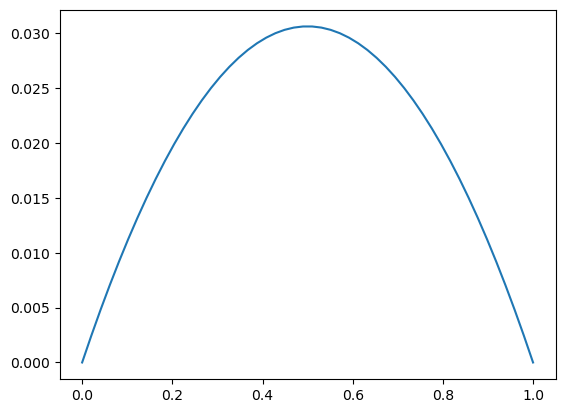

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

grid = np.linspace(0,1)
prior = stats.beta(a=2,b=2).pdf(grid)
prior = prior / sum(prior)

plt.plot(grid,prior)

Visualizing probability distributions will be an important skill throughout the class. Building little grids and then assigning `.pdf()`s to them is an okay technique if you already know what region you want to visualize. But sometimes it can induce artifacts if you mess up the range. The quick and dirty way to visualize any distribution is to draw a bunch of samples and make a histogram.

(array([ 305.,  774., 1081., 1341., 1481., 1463., 1378., 1107.,  778.,
         292.]),
 array([0.00480324, 0.10403296, 0.20326267, 0.30249239, 0.4017221 ,
        0.50095182, 0.60018153, 0.69941125, 0.79864096, 0.89787068,
        0.99710039]),
 <BarContainer object of 10 artists>)

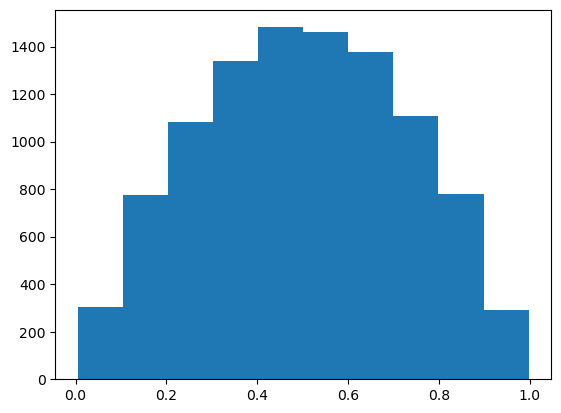

In [3]:
samples = stats.beta(a=2,b=2).rvs(10000)
plt.hist(samples)

Notice the correspondence between the histogram of samples and the pdf. They have the same rough shape, even if they operate on different scales. This is no accident - any probabability distribution can be sampled to produce a histogram that mirrors its likelihood function.

### The Gallary of Betas

You can get a sense for the different shapes below. The key less is, if you want a very flat beta distribution, a=1, b=1 is a good bet. Otherwise, if you want some skew one direction or the other, bumping up the numbers and making them asymmetrical would help.

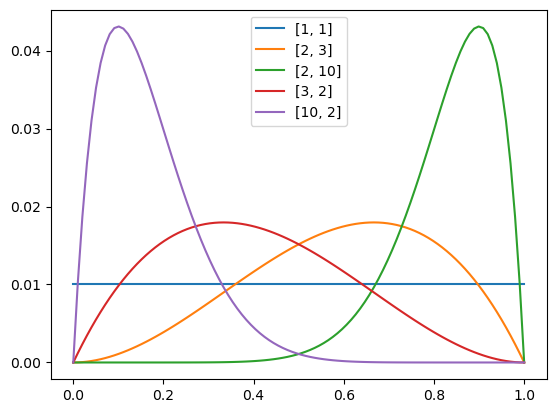

In [4]:
beta_params = [[1,1],[2,3],[2,10],[3,2],[10,2]]

for b in beta_params:

    grid = np.linspace(0,1,100)
    prior = stats.beta(b[1],b[0]).pdf(grid)
    prior = prior / sum(prior)

    plt.plot(grid,prior,label=str(b))
    plt.legend()

### One weird beta

Beta distributions can also be flipped upside down into a U shape. If you set $a$ and $b$ to be less than 1, you get the flip. But it's buggy. Notice this error.

C:\Users\dsaun\AppData\Local\Temp\ipykernel_18684\1772275778.py:3: RuntimeWarning: invalid value encountered in divide
  prior = prior / sum(prior)


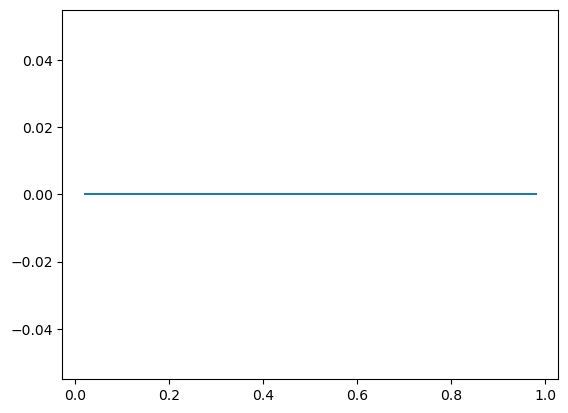

In [5]:
grid = np.linspace(0,1)
prior = stats.beta(0.5,0.5).pdf(grid)
prior = prior / sum(prior)

plt.plot(grid,prior)

The division error shows up because the start and end of the distribution are both infinity. This arises due to the way `.pdf` functions have to approximate things.

In [6]:
prior

array([nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan])

The easiest solution is to just slice off 0 and 1 from the distribution. Notice the grid below.

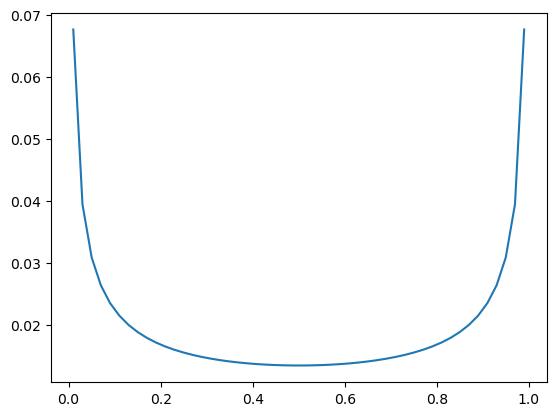

In [7]:
grid = np.linspace(0.01,0.99) # grid change.
prior = stats.beta(0.5,0.5).pdf(grid)
prior = prior / sum(prior)

plt.plot(grid,prior)

## For parameters that must be positive

Sometimes all you know about a parameter is that it must be zero or bigger. For example, the hot hands parameter cannot be negative. It's a feature of our model that you perform better when you get them right. So to reflect that, we need positive valued parameters. 

### The exponential distribution

Furthermore, we should also think that the hot hands factor is never super big. If your performance goes up by 0.5 every time you get a cup right, that is pretty implausible. It's a huge jump. It seems like small hot hands factors are the most likely. So we want a distribution that gently slows downward. The exponential is our friend here.

`stats.expon(loc=0,scale=50).pdf(grid)`

It has a starting place `loc=`. We almost always assume 0 but technically you can start it wherever you like. It assigns a cutoff on the left-hand side of the graph. The scale determines how streeply it declines. Because we want only a modest penalty to big hot hands factors, we can set this really high. It makes the slope more gentle.

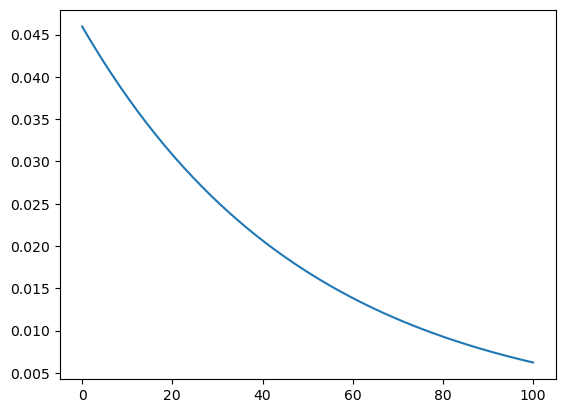

In [8]:
grid = np.linspace(0,100)
prior = stats.expon(loc=0,scale=50).pdf(grid)
prior = prior / sum(prior)

plt.plot(grid,prior)

Often times when we are building prior distributions, we have a best guess for the parameter's true value. It would be nice if we could have the highest point of our prior fall on top of our best guess and then have our uncertainty fall symmetrically around that point. In the exponential world, that is not possible. The highest point is always nearly the `loc`, typically 0. 

Meanwhile, the point that dissects our distribution into two equal halves is far away, typically close to where the `scale` parameter is. The median is the point that slices the distribution in half.

In [36]:
stats.expon(loc=0,scale=50).median()

34.657359027997266

So if you would be willing to put half your confidence below some point and half your confidence above some point, try to adjust the scale parameter so the median falls near that point.

This little exploration of the exponential distribution teaches us an important philosophical lesson - sometimes there is no flat prior distribution. In the last couple of classes, we've been able to model total ignorance with flat priors. When you have a little box with a boundary at 0 and 1, it is easy to divide your confidence evenly throughout the box. However, we don't have that little box when the parameter domain goes up to infinity. It is impossible to assign equal probability to all possible positive numbers. So we always face non-flat priors. This will make our life hard, no doubt about that.

Here we illustrate what four versions of the exponential look like with different scale parameters.

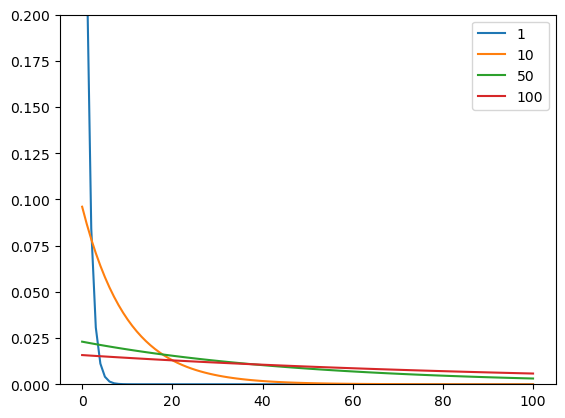

In [9]:
scales = [1,10,50,100]

for scale in scales:
    grid = np.linspace(0,100,100)
    prior = stats.expon(loc=0,scale=scale).pdf(grid)
    prior = prior / sum(prior)

    plt.plot(grid,prior,label=str(scale))
    plt.ylim([0,0.2])
    plt.legend()

### The Gamma distribution

The exponential distribution can be pretty restrictive. The highest probability is almost right beside 0. Most of the time, we have a pretty good guess as to where the parameter is supposed to be and our guess isn't right beside zero. The `stats.gamma()` distribution gives us a bit more control because we can adjust the `a` parameter in the first position. But it also faces some quirks.

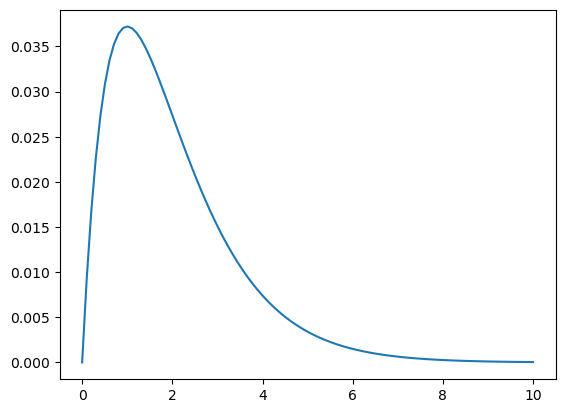

In [38]:
grid = np.linspace(0,10,100)
prior = stats.gamma(a=2,scale=1).pdf(grid)
prior = prior / sum(prior)

plt.plot(grid,prior)

Typically, we keep the scale at 1 and wiggle the scale parameter to center on the number we like. However, we can produce tighter or more narrow shapes by adjusting the scale.

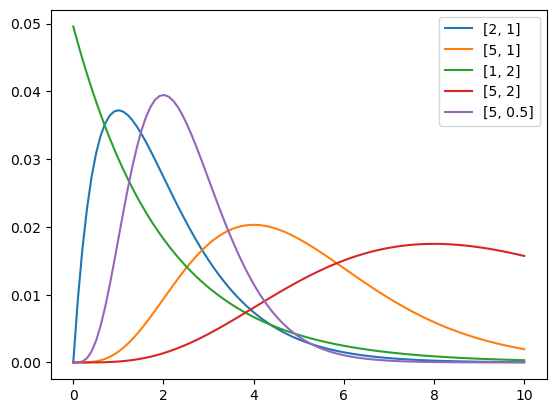

In [37]:
gamma_params = [[2,1],[5,1],[1,2],[5,2],[5,0.5]]

grid = np.linspace(0,10,100)
for g in gamma_params:
    prior = stats.gamma(g[0],scale=g[1]).pdf(grid)
    prior = prior / sum(prior)

    plt.plot(grid,prior,label=str(g))
plt.legend()

The first two lines make sense - their highest point is at 2 and 5 with a medium width. The other three lines behave more unusually. The Gamma(1,2) looks like an exponential distribution. It is. Whenever the `a` parameter equals 1 your get the exponential. Meanwhile, the Gamma(5,2) and Gamma(5,0.5) have high points away from 5. Their high points are roughly close to $5*2$ and $5*0.5$. But still, not quite. This arises just from the weirdness of positive distributions. These distributions have a firm boundary at 0 and then span all the way to infinity. So concepts like "the middle" of the distribution are a bit weird. We shouldn't expect the mean, median and mode of these distributions to line up with one another. 

For example, the mean of the gamma is a little bit away from the highest point.

In [40]:
stats.gamma(5,scale=2).mean()

10.0


My best advise is to always just draw a picture. It is okay to hapazardly tune the parameters of these prior distributions until you get something you like. With a picture, you can check your intuitive understanding against the mathematical description. Without it, you are likely lost.

## For parameters that can be positive or negative

The normal distribution goes in both directions endlessly. You control the center with `loc=` and the spread with `scale=`. They are great when you want to say a certain region of parameters is pretty plausible and then everything around that region has decreasing plausibility.

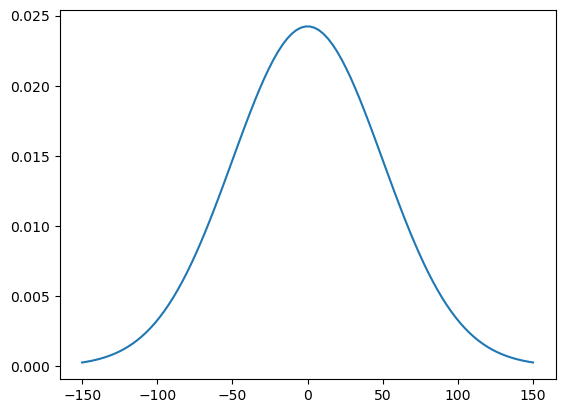

In [12]:
grid = np.linspace(-150,150,100)
prior = stats.norm(loc=0,scale=50).pdf(grid)
prior = prior / sum(prior)

plt.plot(grid,prior)

### Gallery of normals

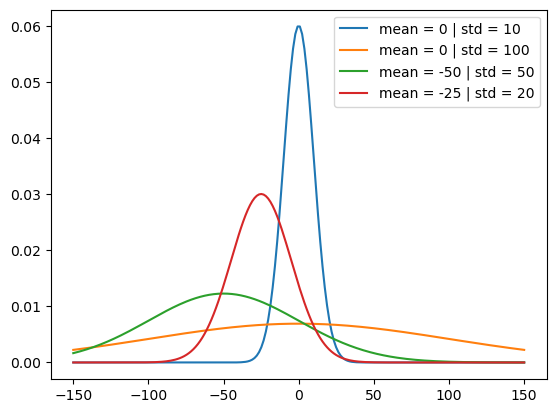

In [13]:
params = [[0,10],[0,100],[-50,50],[-25,20]]

for param in params:
    grid = np.linspace(-150,150,200)
    prior = stats.norm(loc=param[0],scale=param[1]).pdf(grid)
    prior = prior / sum(prior)

    plt.plot(grid,prior,label="mean = " + str(param[0]) + " | std = " + str(param[1]))
    plt.legend()

# Case study - Priors for the hot hands model

## Three principles for setting good priors

With all that in mind, it would be good if we had some guidelines to help us set good priors. I think if you remember three and half principles you'll rarely go wrong.

1. Include what you know.
2. Maximize uncertainty over what you do not.
3. Don't double count your data.

Include what you know means incorporate logic, theory, intuition, and background evidence if you have it. Neglecting to use those tools is irresponsible. You can almost always make smart inferences about the plausible range of parameter values just by stopping and thinking. Sometimes just a google search on your topic will churn up something useful.

Maximize uncertainty what you do know means, don't overstate your case. If the arguments in #1 are not terribly conclusive, set modest or flatter priors.

Finally, #3 means you cannot use your data to tell you where to set your prior. Your prior is *prior* to the data. It's everything you think, except the data at hand. Sometimes students, unsure how to set a prior, will tune it to the match the data as much as possible. This is illegal. Bayesian theorem the only valid way to adjust your prior in light of the data. If you use the data to tune the prior, it's like counting you data twice. Once to tune the prior and once to perform the update. But you can't double your sample size just by wishing you had more data.

Let's apply this reasoning to our hot hands model. Update our code.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def simulate_hh_bristol(a,n,h):
    '''Returns a list of 0s and 1s of lengeth n
    with 0 indicating failure and 1 indicating success.
    
    a = accuracy on each cup
    n = the number of cups
    h = the increment by which she gets better or worse'''

    experiment = []
    a_series = []

    for i in range(n):
        
        outcome = np.random.choice([1,0],p=[a,1-a])
        experiment.append(outcome)
        a_series.append(a)

        if outcome == 1:
          a = a + h
        else:
          a = a - h

        # check for ceiling
        # / floor problems

        if a < 0:
          a = 0
        if a > 1:
          a = 1
        
        # print(a)
        
    return experiment, a_series

def run_hh_experiments(a,n,precision,h):
    '''Returns a list containing the number of cups lady bristol
    guessed correctly over many experiments
    
    a = accuracy on each cup
    n = number of cups per experiment
    precision = the number of experiments
    h = the increment by which she gets better and worse'''
    
    
    all_trials = []

    for i in range(precision):
      
        results, a_series = simulate_hh_bristol(a,n,h)
        correct = sum(results)
        all_trials.append(correct)

    return all_trials

def likelihood_hh(a,h,n,k,precision):
    '''
    Compute the likelihood of getting k successes out of n
    trials assuming probability of success a on each trial.

    a = accuracy
    h = the increment by which she gets better and worse
    n = total number of trials
    k = the number of successes
    precision = the number of simulated experiments used to estimate
    the likelihood'''

    all_trials = run_hh_experiments(a,n,precision,h)
    matches = all_trials.count(k)
    prob = matches / precision

    return prob

We'll consider each parameter in turn.

## Hot hands parameter

The hot hands parameter `h` is the most fun. First question - what are possible values for `h`? What is the domain of this parameter? Well, it would be silly if h was as big as 1.1. Bristol would improve more than is possible after one success. But from the point of view of the math, there isn't an error here. We've programmed our bristol model so it can legitimately execute the code when $h > 1$. So technically the domain is [0, inf], although for our purposes, we'll only care to explore the parameter space from [0, 1]. So let's use an exponential distribution for this one.

Second question - what are plausible values for `h`? If Lady Bristol improved by 0.75 every time she got one right, we should almost always exceed the ceiling. If her initial accuracy is around 0.5 and she gets the first one right, her accuracy shoots up to 1. If she gets the first one wrong, it shoots to zero. That's a really extreme assumption.

To handle extremely high parametes for `h`, we'll steadily discount high values of `h` with an exponential distribution.

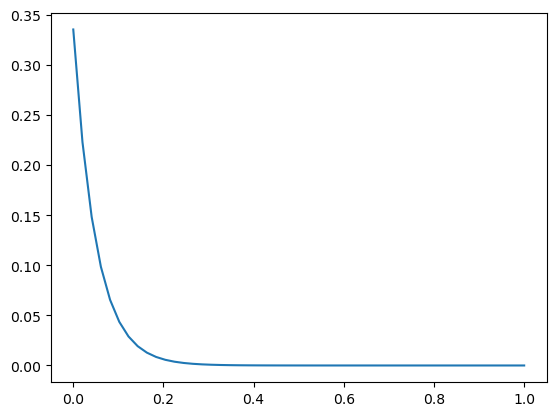

In [28]:
h_grid = np.linspace(0,1,50)

h_prior = stats.expon(loc=0,scale=0.05).pdf(h_grid)
h_prior = h_prior / sum(h_prior)

plt.plot(h_grid,h_prior)

How should we tune the exponential distribution? This is an matter of judgment so feel free to disagree with my choices. But my reasoning is like this: a hot hands factor of 0.2 isn't impossible but it's still pretty big. That means if she gets 2 right in a row and she started at 0.5 accuracy, she's nearly perfect. I don't think confidence can make *that* big of a difference. Just a little difference. So I want the distribution to start approaching zero around 0.2. Finally, I do think loads of small `h` factors are the most plausible. So I want the distribution to peak around 0 and assign a good chunk of probability between 0 and 0.1.

When it comes to the assignment, the challenge is to make your reasoning clear, not perfect. If you have reasons for each thing you do and those reasons are plausible, you'll get full marks. We want to see that your model and your reason *cohere*. We don't need to see you come to exactly the same opinion that I or your TA would come to. But if you make choices that are unexplained or the explanation is only vaguely connected to the mathematical representation, partial marks are in order.

What does the update look like? I apply the grid approximation algorithm and plot the prior beside the posterior.

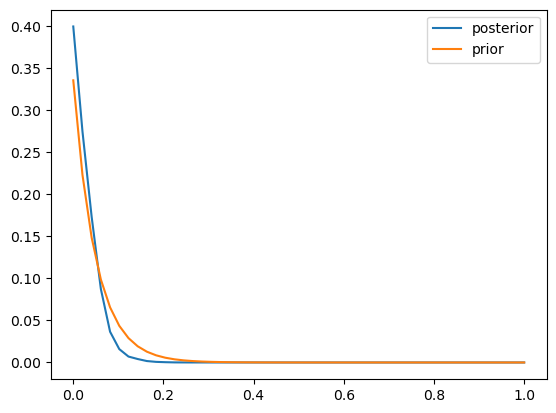

In [32]:
a = 0.5
n = 12
k = 8
precision = 10000

likelihoods = [likelihood_hh(a,h,n,k,precision) for h in h_grid]

likelihoods = np.array(likelihoods)

unnormalized_posts = likelihoods * h_prior
    
posterior = unnormalized_posts / sum(unnormalized_posts)

plt.plot(h_grid,posterior,label="posterior")
plt.plot(h_grid,h_prior,label="prior")
plt.legend()

According to your posterior, actually even smaller `h` factors are most plausible. The posterior shifts toward zero. So if the hot hands factor is relevant, it is probably not too big.

We can understand the update a little bit better by looking at the likelihood distribution. It shows that the model explains the data the best with a very slight `h` factor, near 0.05. So that's a sign that is the true parameter value. However, our prior distribution discounts it. So the resulting posterior shows little evidence that 0.05 is the best value.

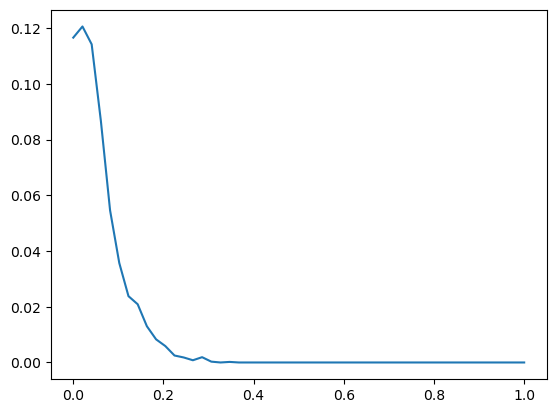

In [33]:
plt.plot(h_grid,likelihoods)

## Accuracy priors

After class one day, a student and I were discussing the Lady Tasting tea problem. They pointed out that it's actually really weird if her accuracy levels drop below 0.5. 0.5 is just guessing at random. If she has no confidence and no skill, she shouldn't *really* perform worse than guessing at random. 

I think that's a pretty good insight. But maybe it's possible to be so flustered that you engage in a bit of self-sabotage, consistently guessing the wrong direction. 

I want to build a prior that assigns accuracy levels above 0.5 to have higher probability than accuracy levels below 0.5. This time, I'll use a beta prior.

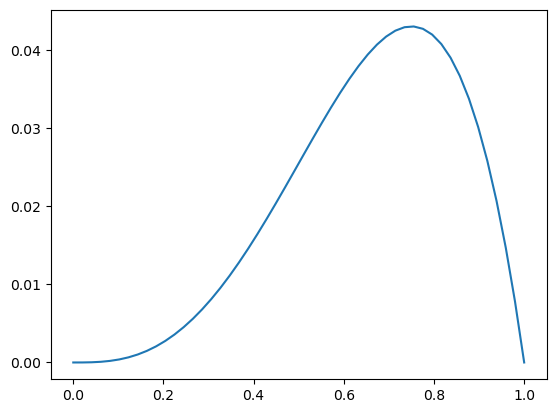

In [49]:
a_grid = np.linspace(0,1,50)

prior = stats.beta(4,2).pdf(a_grid)
prior = prior / sum(prior)

plt.plot(a_grid,prior)

Again, we can tune the beta prior and there is room for disagreement on what the right tuning is. 

Here is what the update looks like:

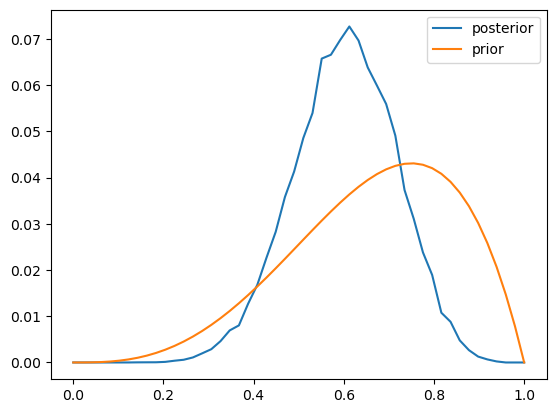

In [50]:
n = 12
h = 0.05
k = 8
precision = 10000

likelihoods = [likelihood_hh(a,h,n,k,precision) for a in a_grid]
    
likelihoods = np.array(likelihoods)
    
unnormalized_posts = likelihoods * prior
    
posterior = unnormalized_posts / sum(unnormalized_posts)

plt.plot(a_grid,posterior,label="posterior")
plt.plot(a_grid,prior,label="prior")
plt.legend()